#### 1. Загрузить файл hr.csv

In [5]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [7]:
hr=pd.read_csv('HR.csv')

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
salary_nominat=[]
for x in hr['salary']:
    if x=='low':
        salary_nominat.append(1)
    elif x=='medium':
            salary_nominat.append(2)
    else:
        salary_nominat.append(3)

In [10]:
hr['salary_nominat']=salary_nominat

In [12]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
salary_nominat           14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [13]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_nominat
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
def moda(x):
    try:
        counts = {}
        for p in x:
            if p not in counts:
                counts[p] = 1
            else:
                counts[p] += 1

        maxp = 0
        mode = None
        for k, v in counts.items():
            if maxp < v:
                maxp = v
                mode = k
        return float(mode)
    except:
        return 'Nan'
for variables in hr:   
    if isinstance(moda(hr[variables]), float):
        print(variables,moda(hr[variables]))

satisfaction_level 0.1
last_evaluation 0.55
number_project 4.0
average_montly_hours 135.0
time_spend_company 3.0
Work_accident 0.0
left 0.0
promotion_last_5years 0.0
salary_nominat 1.0


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [15]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_nominat
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_nominat,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


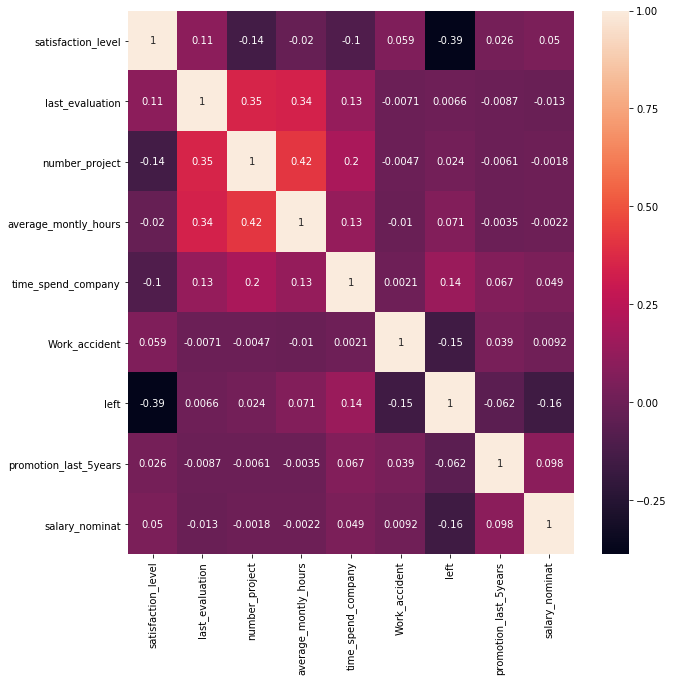

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

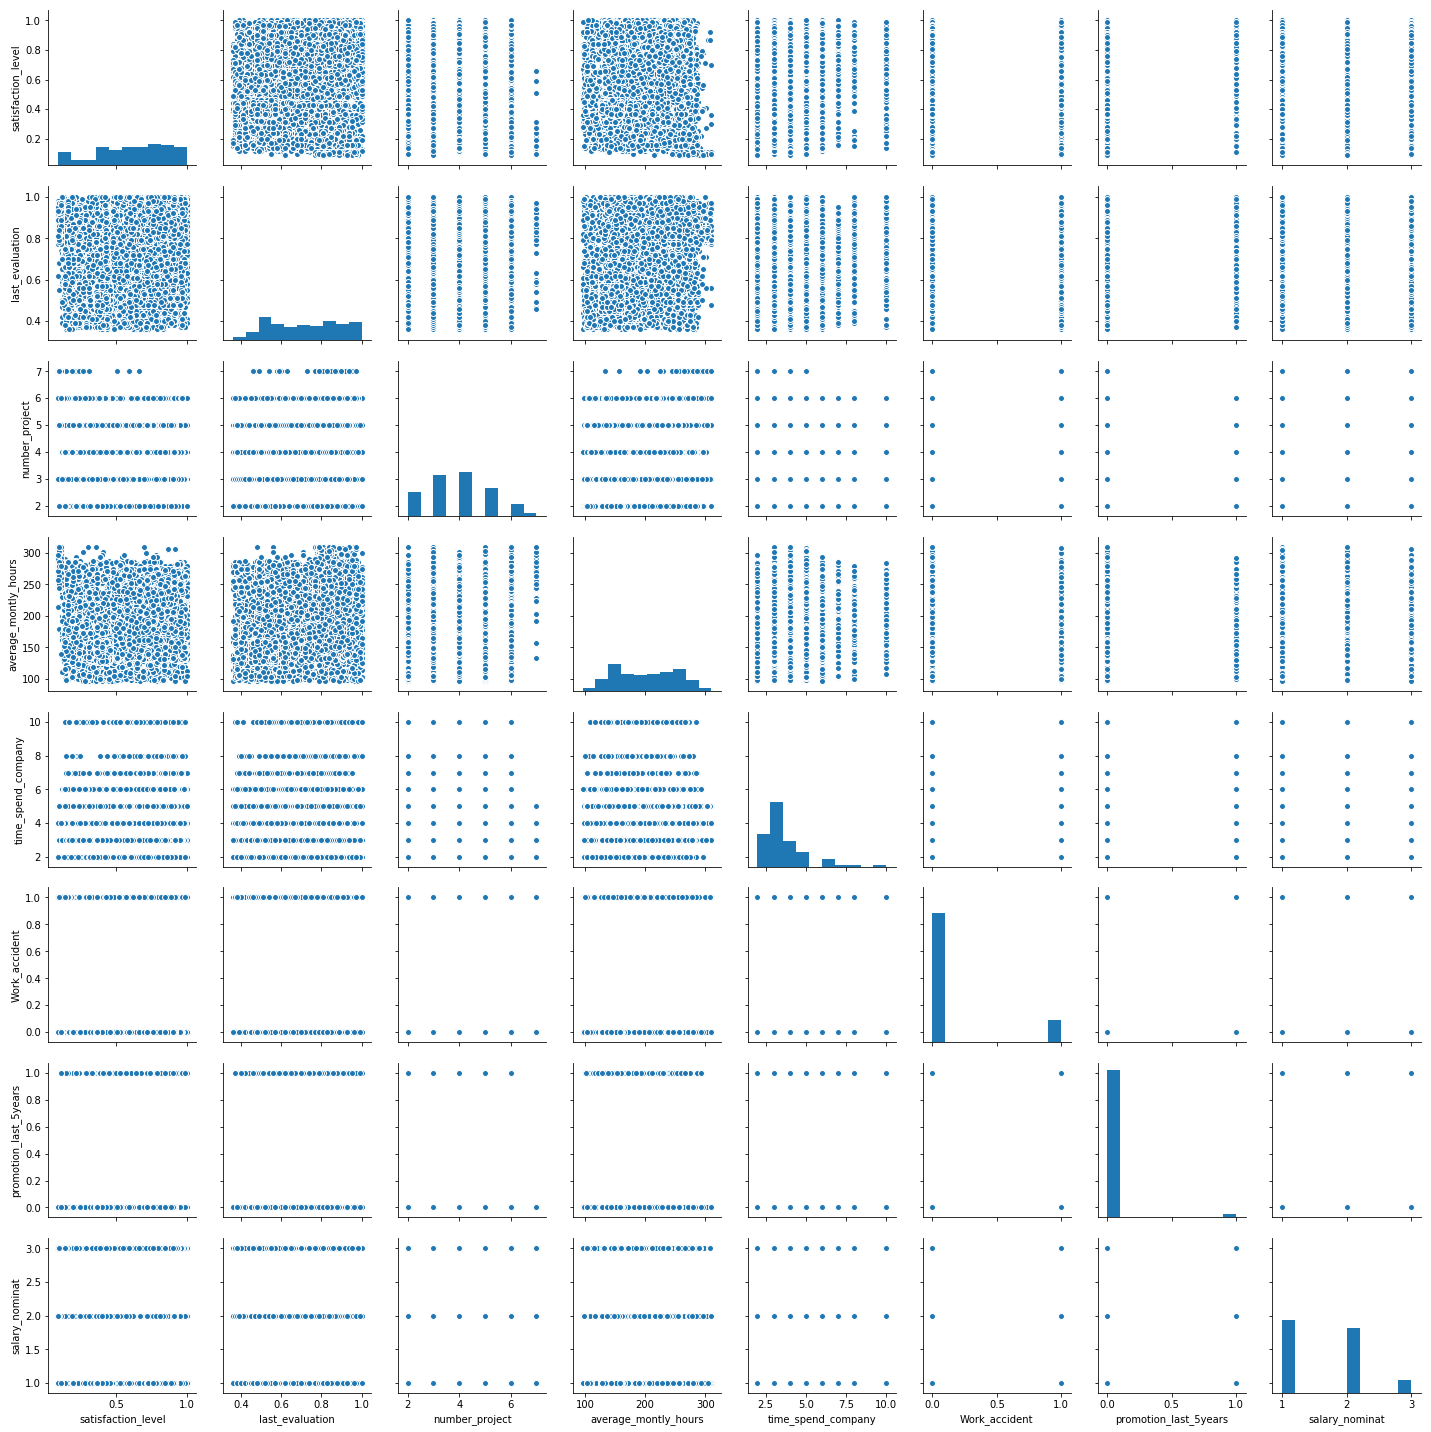

In [210]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_nominat']]);
sns_plot.savefig('pairplot.png')

#### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными


In [221]:
#Средние не равны
stats.ttest_ind(hr['time_spend_company'], hr['number_project'], axis=0, equal_var=True)

Ttest_indResult(statistic=-19.536753519083355, pvalue=1.7938911515379e-84)

In [228]:
#Средние не равны
stats.ttest_ind(hr['time_spend_company'], hr['last_evaluation'], axis=0, equal_var=True)

Ttest_indResult(statistic=231.7670054076573, pvalue=0.0)

#### 6. Рассчитать сколько работников работает в каждом департаменте

In [164]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_nominat
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [165]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

#### 7. Показать распределение сотрудников по зарплатам

In [166]:
print(hr['salary'].value_counts()/len(hr['salary'])*100)

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64


#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [167]:
hr.groupby(['sales', 'salary']).agg({'salary':['count']})

salary
                    count
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

#### 9. Сколько сотрудников покинули компанию

In [168]:
hr['left'].sum()

3571

#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Разделим наш датафрейм на 2- уволившихся работников и неуволившихся. Выберем по 1000 случайных строк

In [243]:
hr_left=hr[hr['left']==1].sample(frac=1).sample(n=1000)

In [244]:
hr_stay=hr[hr['left']==0].sample(frac=1).sample(n=1000)

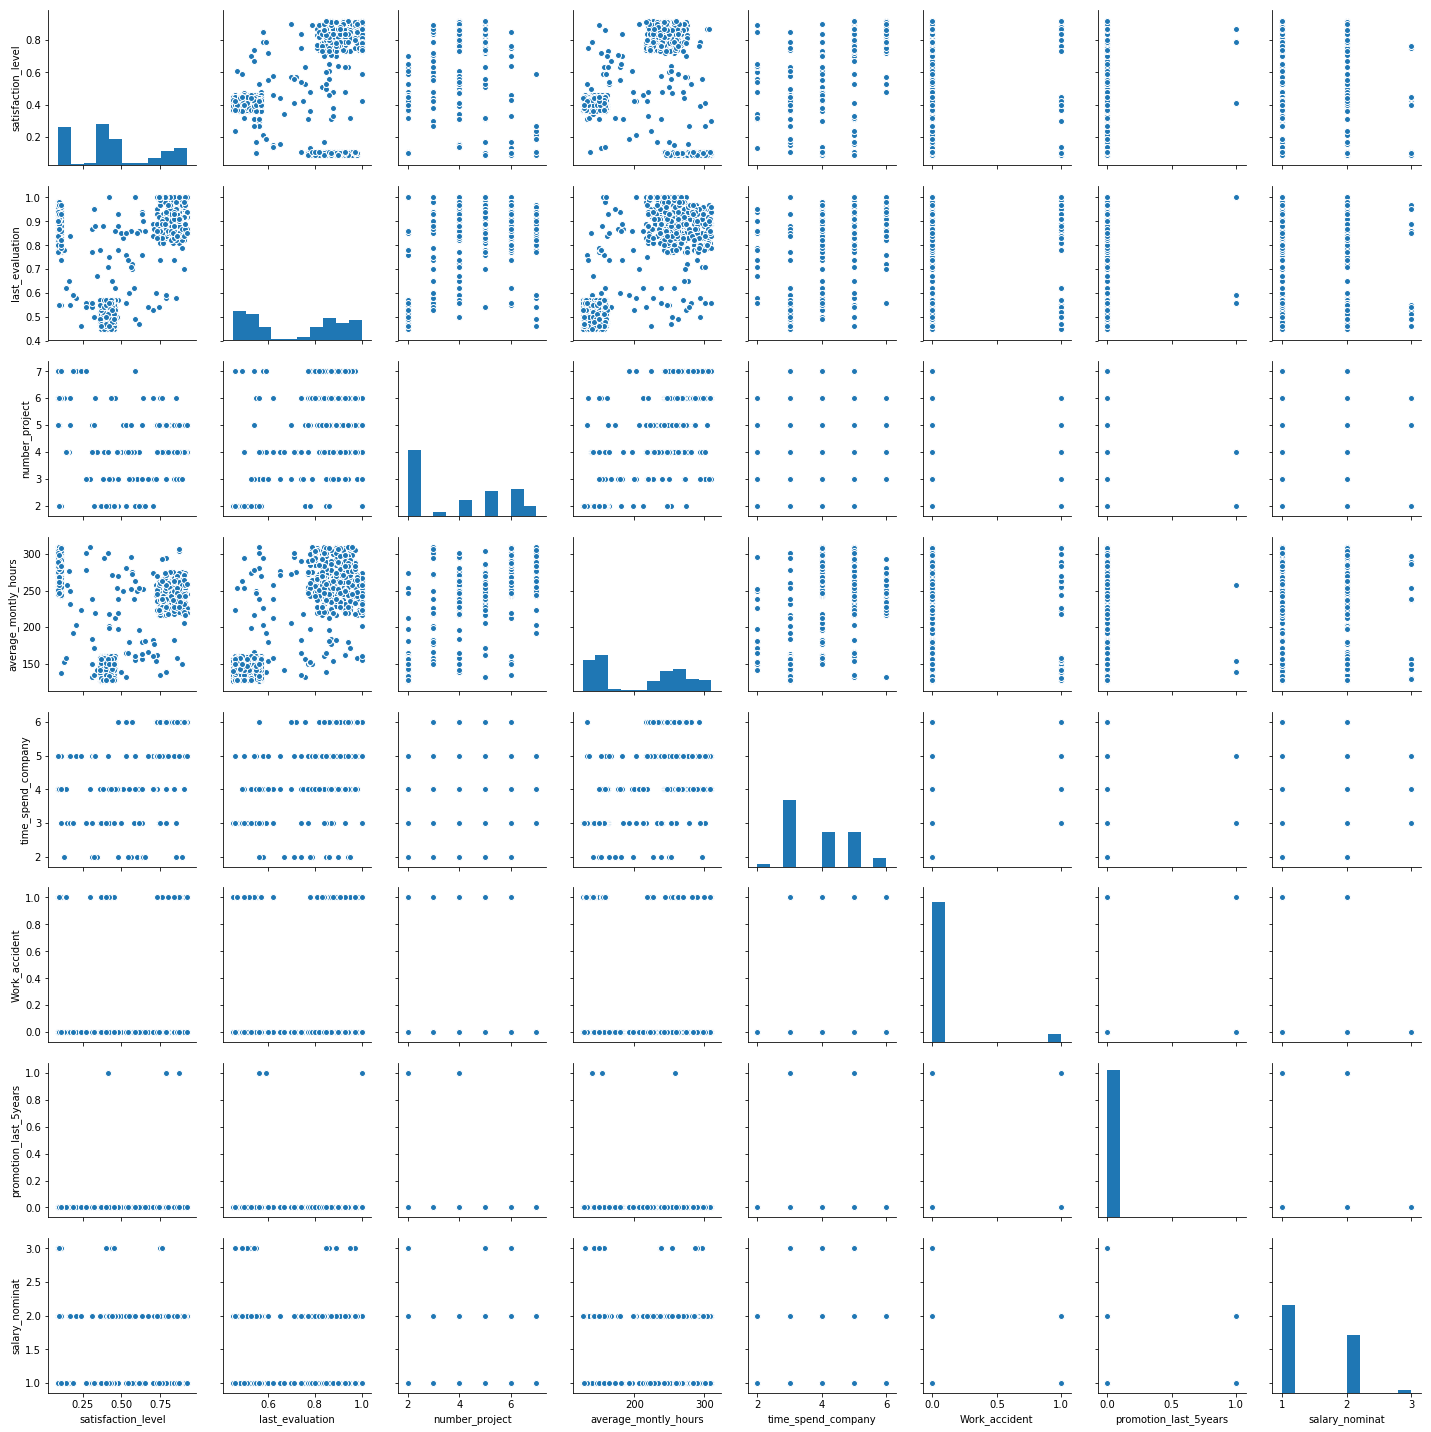

In [246]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    hr_left[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_nominat']]);
sns_plot.savefig('pairplot.png')

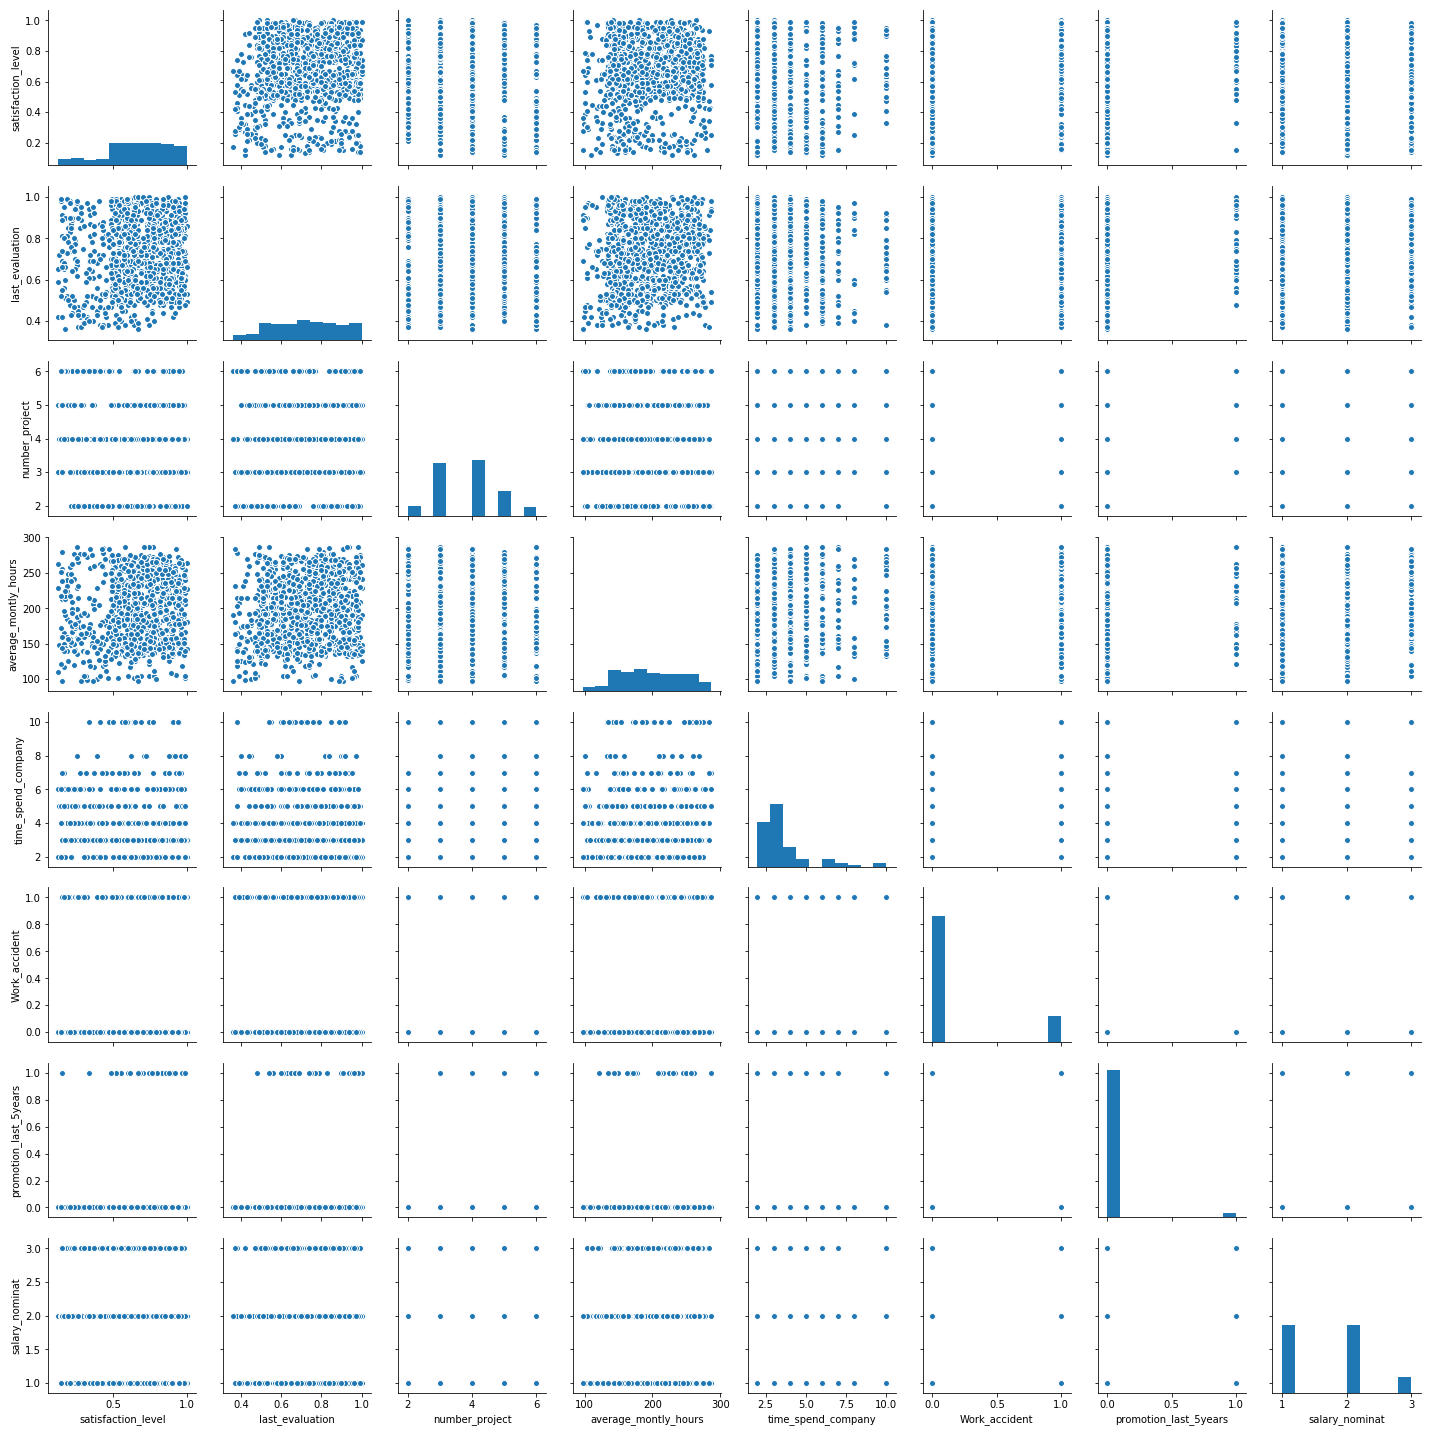

In [247]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    hr_stay[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary_nominat']]);
sns_plot.savefig('pairplot.png')

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


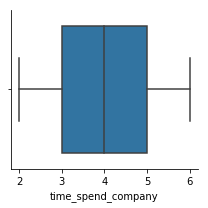

In [248]:
# Если нарисовать бохплот можно увидеть что для обеих групп сущевенно отличаются средние
g = sns.FacetGrid(hr_left)
g.map(sns.boxplot, 'time_spend_company')

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


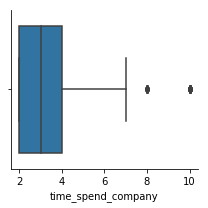

In [249]:

g = sns.FacetGrid(hr_stay)
g.map(sns.boxplot, 'time_spend_company')

##### Проверим эту гипотезу с помощью T-test, отверугнув гипотезу о равенстве средних в группах. Таким образом ушедшие сотрудники работали дольше

In [251]:
stats.ttest_rel(hr_left['time_spend_company'], hr_stay['time_spend_company'])  

Ttest_relResult(statistic=7.081290908220433, pvalue=2.690233651343951e-12)

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


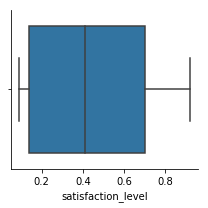

In [254]:
#У тех кто сотался в компании уровень удовлетворенности выше
g = sns.FacetGrid(hr_left)
g.map(sns.boxplot, 'satisfaction_level')

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


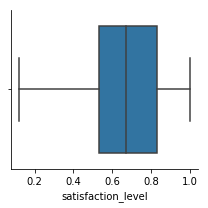

In [253]:
g = sns.FacetGrid(hr_stay)
g.map(sns.boxplot, 'satisfaction_level')

In [255]:
#Проверим это наблюдение
stats.ttest_rel(hr_left['satisfaction_level'], hr_stay['satisfaction_level'])  

Ttest_relResult(statistic=-21.171243430917084, pvalue=1.7837205410568814e-82)